In [1]:
import numpy as np
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import requests
import torch
torch.manual_seed(1)
from pathlib import Path 
import os
import matplotlib.dates as mdates


In [2]:
APP_DIR = Path().parent.absolute() 
APP_DIR

WindowsPath('C:/Users/user/Desktop/LSTM_prices_prediction')

# Examine the Data

In [3]:
df = pd.read_csv('data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/10/1996,0.213170,0.218750,0.212054,0.215960,0.183808,276696000
1,10/11/1996,0.217634,0.219866,0.214286,0.216518,0.184282,120691200
2,10/14/1996,0.218750,0.226563,0.216518,0.225446,0.191881,269684800
3,10/15/1996,0.229911,0.231027,0.223214,0.225446,0.191881,363059200
4,10/16/1996,0.225446,0.233259,0.219866,0.229911,0.195681,334745600
...,...,...,...,...,...,...,...
6666,4/6/2023,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
6667,4/10/2023,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
6668,4/11/2023,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
6669,4/12/2023,161.220001,162.059998,159.779999,160.100006,160.100006,50133100


In [4]:
stats = df.describe()
stats = stats.drop(['count'])
skewness = df.skew(numeric_only = True)
stats.loc['skewness'] = skewness
kurtosis = df.kurtosis(numeric_only = True)
stats.loc['kurtosis'] = kurtosis
stats

,Open,High,Low,Close,Adj Close,Volume
mean,27.574337,27.889332,27.268199,27.591847,26.518999,4.104027e+08
std,43.194357,43.725962,42.693246,43.234617,43.003302,3.867462e+08
min,0.114955,0.118304,0.113839,0.115513,0.098315,3.519590e+07
25%,0.546875,0.557132,0.540536,0.549286,0.467507,1.426825e+08
50%,7.273929,7.339286,7.182500,7.264286,6.182768,2.958368e+08
75%,30.966249,31.222500,30.636251,30.871249,28.080184,5.407542e+08
max,182.630005,182.940002,179.119995,182.009995,180.683853,7.421641e+09
skewness,2.038258,2.040130,2.036587,2.038582,2.084133,3.077137e+00
kurtosis,3.128614,3.132223,3.126238,3.130121,3.275641,2.422910e+01


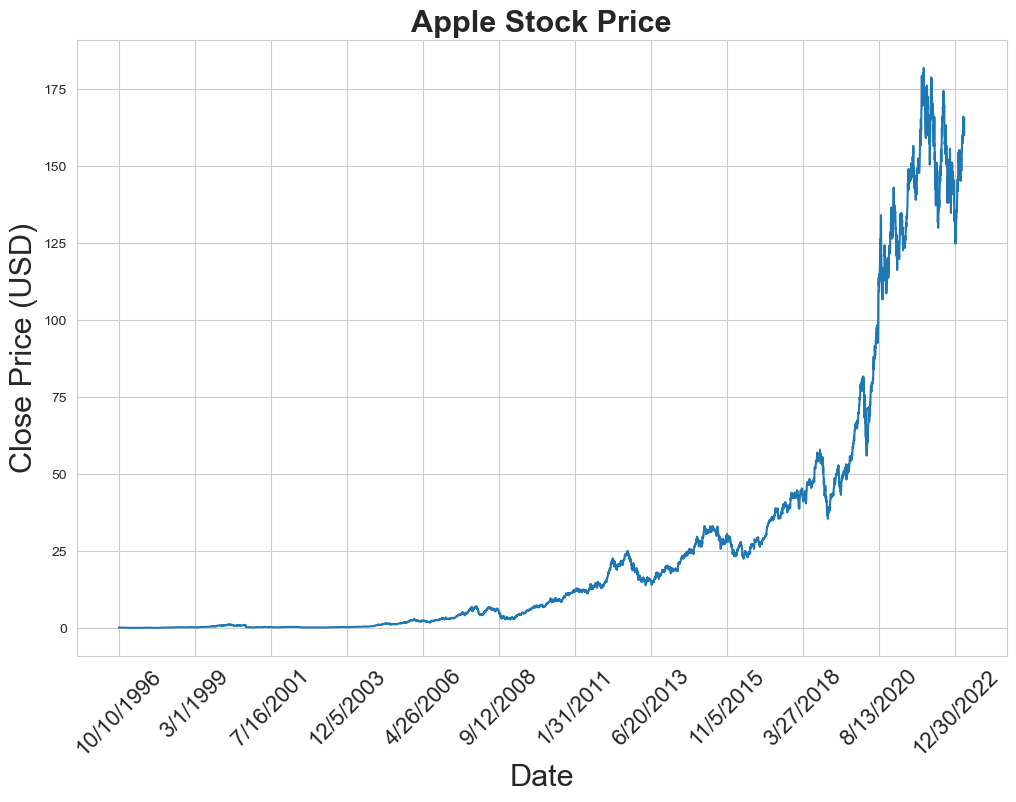

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 8))
plt.plot(df[['Close']])
plt.xticks(range(0, df.shape[0], 600), df['Date'].loc[::600], rotation=45, fontsize=16)
plt.title("Apple Stock Price", fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=22)
plt.ylabel('Close Price (USD)', fontsize=22)
plt.show()

## Training the model
In **train.py** we define several functions for data loading, preprocessing and splitting into train and test sets.\
In **LSTM.py** we construct LSTM class for price prediction, which we also use for training and for inference engine

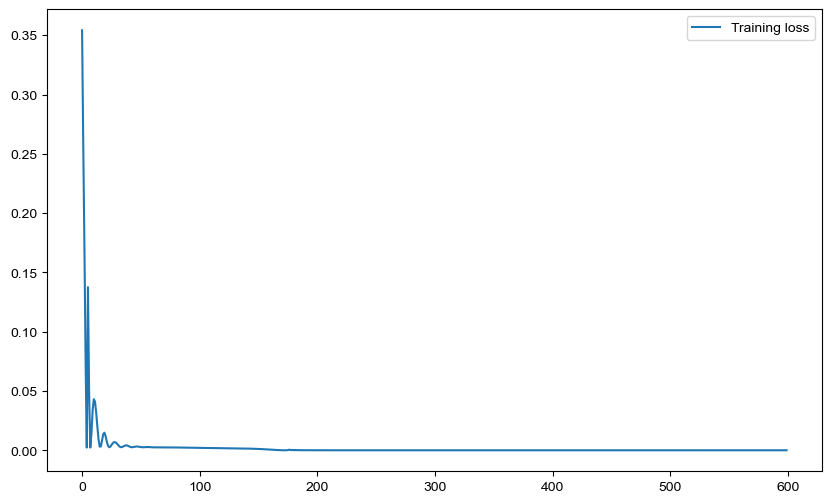

In [6]:
with open(APP_DIR/'training/loss.pkl','rb') as fig:
    fig = pickle.load(fig)
plt.show()

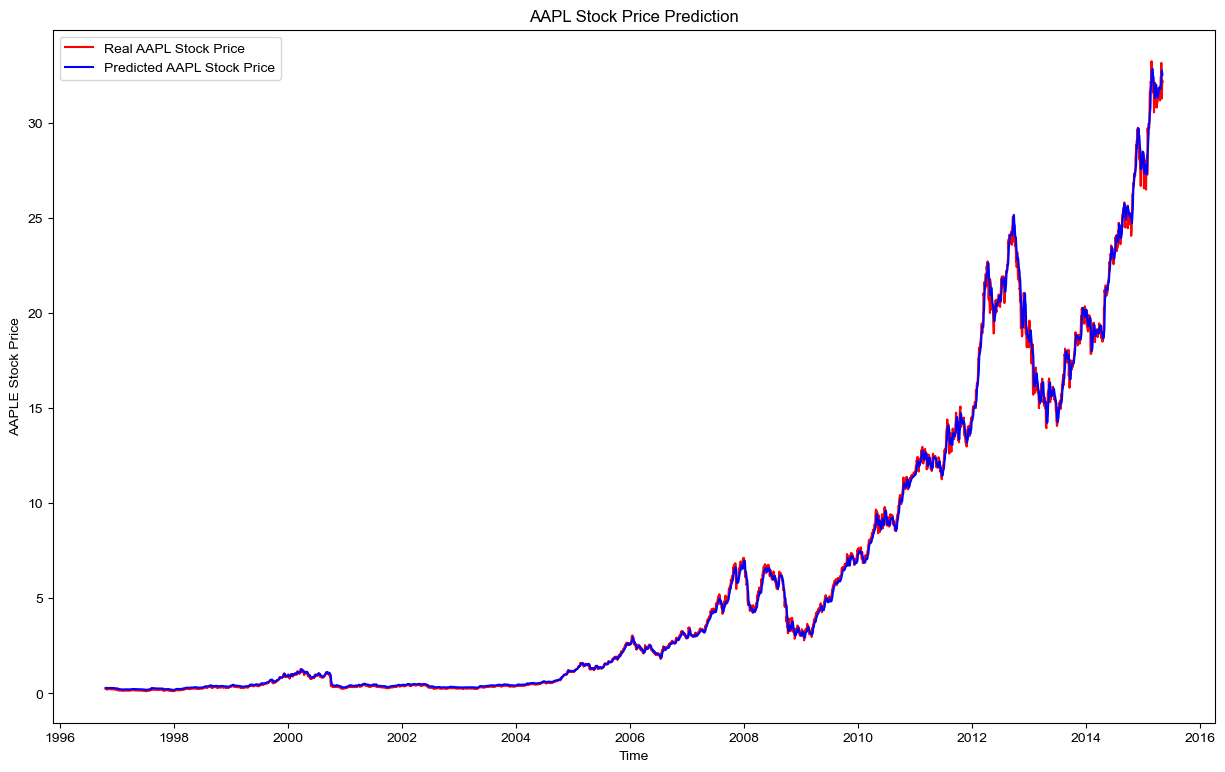

In [7]:
with open(APP_DIR/'training/train_pred.pkl','rb') as fig:
    fig = pickle.load(fig)
plt.show()

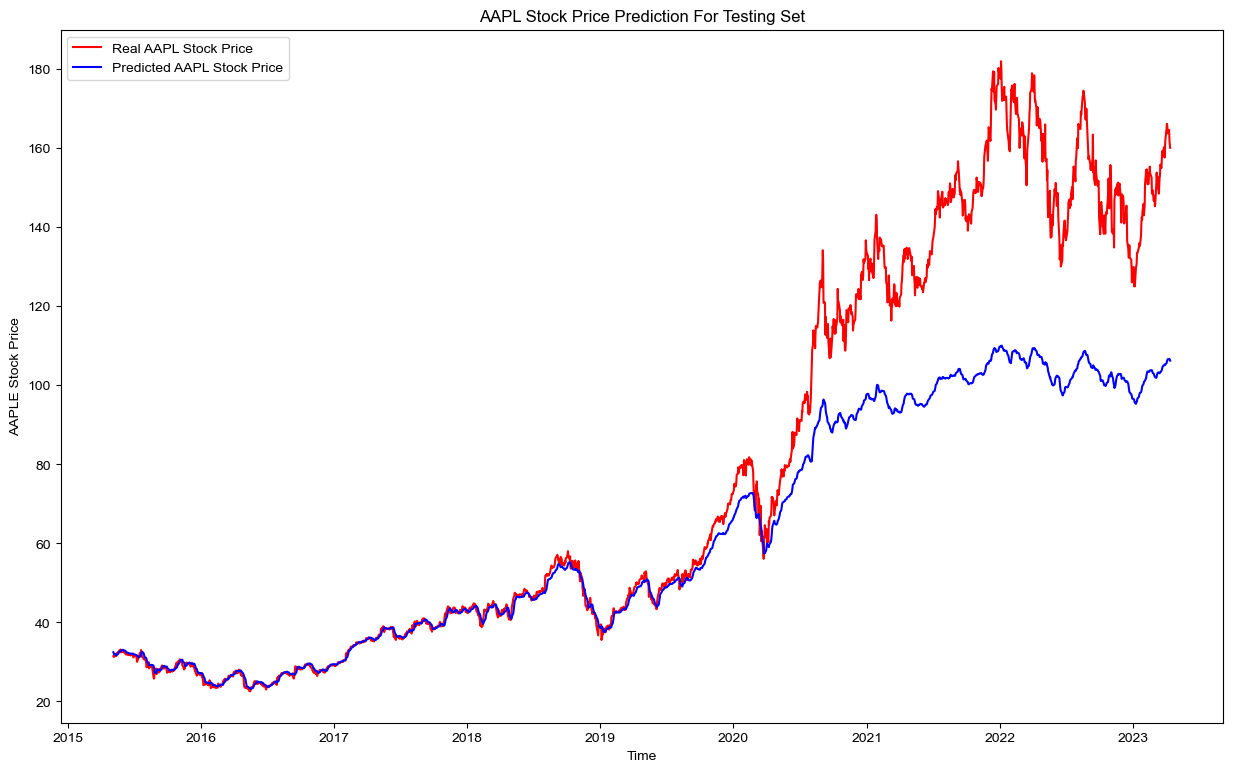

In [8]:
with open(APP_DIR/'training/test_pred.pkl','rb') as fig:
    fig = pickle.load(fig)
plt.show()

## Inference engine
In **inference_engine.py** we combine the preprocessing, predicting and postprocessing functions for easier use.

## Tests


In [9]:
!pytest --verbose
# !pytest tests/test_training.py --verbose
# !pytest tests/test_performance.py --verbose


============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\user\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\user\Desktop\LSTM_prices_prediction
plugins: anyio-4.2.0, dash-2.16.1, cov-5.0.0
collecting ... collected 8 items

tests/test_inference.py::test_preprocess PASSED                          [ 12%]
tests/test_inference.py::test_preprocess_value_error PASSED              [ 25%]
tests/test_inference.py::test_inference PASSED                           [ 37%]
tests/test_performance.py::test_model_performance PASSED                 [ 50%]
tests/test_performance.py::test_model_performance_acc PASSED             [ 62%]
tests/test_training.py::test_load_data PASSED                            [ 75%]
tests/test_training.py::test_data_processing PASSED                      [ 87%]
tests/test_training.py::test_split_data PASSED                           [100%]

========================

In [10]:
!pytest --cov 

============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0
rootdir: C:\Users\user\Desktop\LSTM_prices_prediction
plugins: anyio-4.2.0, dash-2.16.1, cov-5.0.0
collected 8 items

tests\test_inference.py ...                                              [ 37%]
tests\test_performance.py ..                                             [ 62%]
tests\test_training.py ...                                               [100%]

---------- coverage: platform win32, python 3.11.7-final-0 -----------
Name                                                              Stmts   Miss  Cover
-------------------------------------------------------------------------------------
C:\Users\user\Desktop\python_project\models\__init__.py               0      0   100%
C:\Users\user\Desktop\python_project\models\inference_engine.py      32      0   100%
C:\Users\user\Desktop\python_project\models\lstm_model.py            19      8    58%


## Example usage of API
Run **main.py** in terminal and go to http://127.0.0.1:8000/docs for documentation

In [11]:
#Getting metadata
response = requests.get("http://127.0.0.1:8000/metadata")
if response.status_code == 200:
    metadata = response.json()
    print(metadata)
else:
    print(f"Request failed with status code {response.status_code}")

{'problem': 'LSTM for stock prices', 'lookback': 7, 'model': 'LSTM', 'train_RMSE': 0.2724790984950782, 'test_RMSE': 26.272847470943496, 'train_MAPE': 0.09799180962856584, 'test_MAPE': 0.12040393636590806, 'datetime': '2024-05-25'}


In [12]:
APP_DIR

WindowsPath('C:/Users/user/Desktop/LSTM_prices_prediction')

In [13]:
df_2024 = pd.read_csv('data/AAPL_predict.csv')
df_2024

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2024,187.149994,188.440002,183.889999,185.639999,185.152283,82488700
1,1/3/2024,184.220001,185.880005,183.429993,184.250000,183.765945,58414500
2,1/4/2024,182.149994,183.089996,180.880005,181.910004,181.432098,71983600
3,1/5/2024,181.990005,182.759995,180.169998,181.179993,180.703995,62303300
4,1/8/2024,182.089996,185.600006,181.500000,185.559998,185.072495,59144500
...,...,...,...,...,...,...,...
95,5/17/2024,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
96,5/20/2024,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
97,5/21/2024,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
98,5/22/2024,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [14]:
if 'Date' in df_2024.columns:
    df_2024['Date'] = pd.to_datetime(df_2024['Date'])

data = {
    "data": df_2024['Close'].values.tolist()
}

{'predictions': [180.95, 181.02, 181.14, 181.05, 180.87, 181.26, 181.83, 182.41, 182.9, 183.18, 183.35, 183.32, 183.21, 182.84, 182.26, 182.04, 181.81, 181.8, 181.94, 182.06, 182.08, 182.17, 182.07, 181.81, 181.51, 181.25, 180.89, 180.53, 180.32, 180.39, 180.29, 180.06, 180.05, 179.95, 179.8, 179.53, 178.7, 177.34, 175.96, 174.55, 173.44, 172.63, 172.01, 171.65, 172.19, 172.72, 173.32, 174.05, 174.96, 174.67, 174.64, 174.25, 173.69, 173.59, 172.94, 171.98, 171.52, 171.18, 170.84, 170.64, 169.94, 169.73, 169.39, 170.47, 171.71, 172.32, 172.31, 172.11, 171.6, 170.67, 169.14, 167.71, 167.24, 167.44, 167.79, 169.1, 169.98, 170.49, 171.42, 173.78, 175.52, 177.08, 178.19, 179.41, 180.08, 180.69, 181.06, 181.57, 181.94, 182.19, 182.43, 182.72, 182.77, 182.46]}


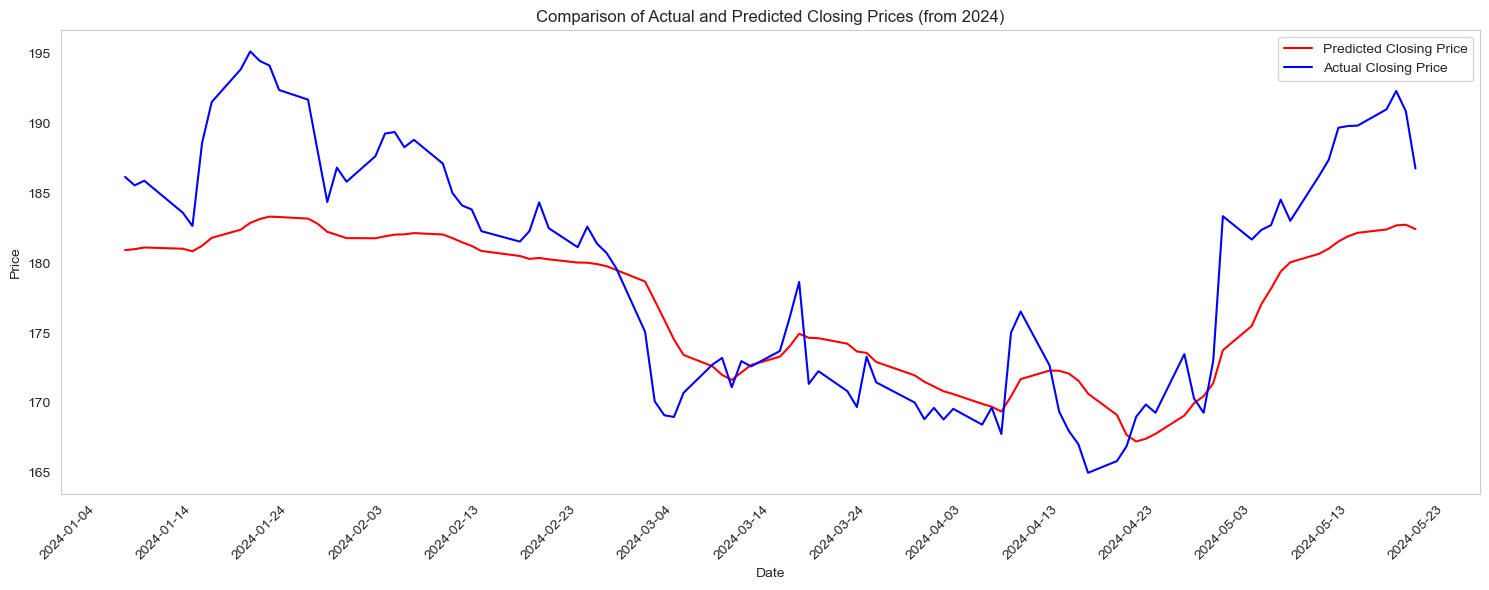

In [15]:
response = requests.post("http://127.0.0.1:8000/predict", json=data)

if response.status_code == 200:
    # Get the predictions from the response
    predictions = response.json()
    print(predictions)
    
    # Adjust the dates and actual data for plotting
    dates_2024 = df_2024['Date'].iloc[6:].tolist()  # Use 'Date' column
    raw_data_adjusted_2024 = df_2024['Close'].values[6:]

  # Plotting the results
    plt.figure(figsize=(15, 6))
    plt.plot(dates_2024, predictions['predictions'], color='red', label='Predicted Closing Price')
    plt.plot(dates_2024, raw_data_adjusted_2024, color='blue', label='Actual Closing Price')
    plt.legend()
    plt.title('Comparison of Actual and Predicted Closing Prices (from 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()  # Adjust the padding to make room for the rotated labels
    plt.show()
else:
    print(f"Request failed with status code {response.status_code}")

# Thanks